In [1]:
import os

In [2]:
pwd

'C:\\Users\\Lokesh\\Programing - Lokesh\\DataScience'

In [3]:
os.chdir(r"C:\Users\Lokesh\Programing - Lokesh\DataScience\Udemey\DATA")

In [4]:
pwd

'C:\\Users\\Lokesh\\Programing - Lokesh\\DataScience\\Udemey\\DATA'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("titanic - train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
len(df)

891

In [9]:
df.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
df= df.drop(["PassengerId","Name",'Ticket'],axis=1)

In [14]:
df.isnull().sum()[df.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [15]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [16]:
df = df.drop(df[df['Embarked'].isnull()].index,axis=0)

In [17]:
df.isnull().sum()[df.isnull().sum()>0]

Age      177
Cabin    687
dtype: int64

In [18]:
df[df['Cabin'].isnull()].index

Int64Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
            ...
            878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
           dtype='int64', length=687)

In [23]:
df = df.drop(['Cabin','Age'],axis=1)

In [24]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [25]:
def missing_data(df):
    Missing_data = 100* df.isnull().sum() / len(df)
    Missing_data1 = Missing_data[Missing_data > 0].sort_values()
    return Missing_data1

In [26]:
missing_data(df)

Series([], dtype: float64)

In [27]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [28]:
for n in df.columns.values:
    a = len(df[n].unique())
    print(n,a)

Survived 2
Pclass 3
Sex 2
SibSp 7
Parch 7
Fare 247
Embarked 3


<AxesSubplot:xlabel='Survived', ylabel='count'>

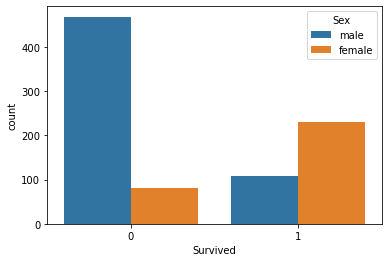

In [30]:
sns.countplot(data=df,x='Survived',hue='Sex')

In [31]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [32]:
X = pd.get_dummies(X)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [73]:
from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [87]:
NB = GaussianNB()
NB.fit(scaled_X_train, y_train)
y_pred = NB.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       175
           1       0.70      0.79      0.74        92

    accuracy                           0.81       267
   macro avg       0.79      0.81      0.80       267
weighted avg       0.82      0.81      0.82       267



In [88]:
RFC = RandomForestClassifier()
RFC.fit(scaled_X_train, y_train)
y_pred = RFC.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       166
           1       0.71      0.73      0.72       101

    accuracy                           0.79       267
   macro avg       0.77      0.78      0.77       267
weighted avg       0.79      0.79      0.79       267



In [89]:
SVM = SVC()
SVM.fit(scaled_X_train, y_train)
y_pred = SVM.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       202
           1       0.58      0.92      0.71        65

    accuracy                           0.82       267
   macro avg       0.77      0.85      0.79       267
weighted avg       0.87      0.82      0.83       267



In [90]:
DTC = DecisionTreeClassifier()
DTC.fit(scaled_X_train, y_train)
y_pred = DTC.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       177
           1       0.68      0.79      0.73        90

    accuracy                           0.81       267
   macro avg       0.78      0.80      0.79       267
weighted avg       0.82      0.81      0.81       267



In [91]:
KNN = KNeighborsClassifier()
KNN.fit(scaled_X_train, y_train)
y_pred = KNN.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       183
           1       0.64      0.80      0.71        84

    accuracy                           0.80       267
   macro avg       0.77      0.80      0.78       267
weighted avg       0.82      0.80      0.80       267

